In [55]:
import numpy as np
import torch
from potentials.synthetic.funnel import Funnel
import matplotlib.pyplot as plt

In [56]:
u = Funnel(n_dim=100, scale=2.0)

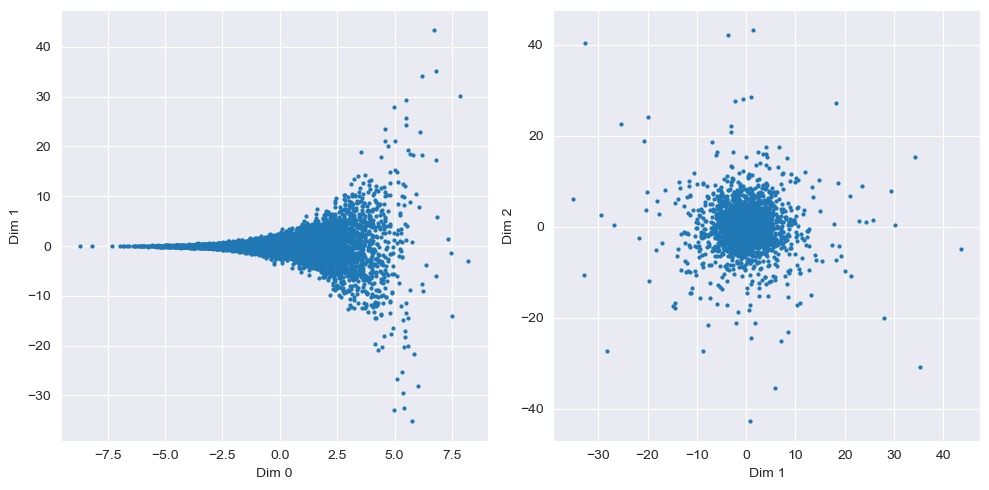

In [57]:
torch.manual_seed(0)
x = u.sample((10000,))[:, :4]
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axes[0].scatter(x[:, 0], x[:, 1], s=4)
axes[0].set_xlabel('Dim 0')
axes[0].set_ylabel('Dim 1')
axes[1].scatter(x[:, 1], x[:, 2], s=4)
axes[1].set_xlabel('Dim 1')
axes[1].set_ylabel('Dim 2')
fig.tight_layout()
plt.show()

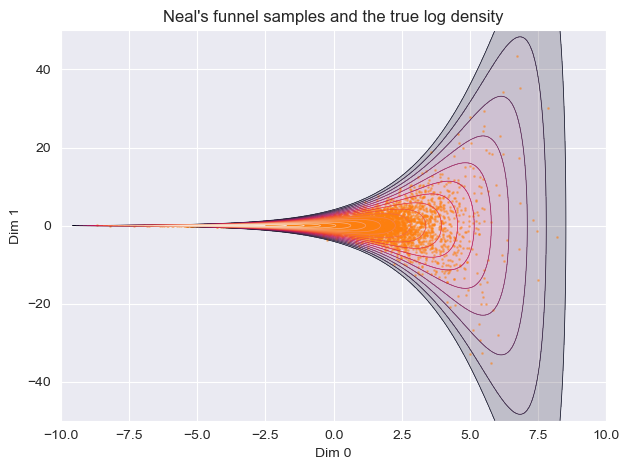

In [111]:
resolution = 1500

u = Funnel(n_dim=100)
u_helper = Funnel(n_dim=2)

xs = torch.linspace(-10, 10, resolution)
ys = torch.linspace(-50, 50, resolution)
xx, yy = torch.meshgrid(xs, ys, indexing="xy")
xx_flat, yy_flat = xx.ravel(), yy.ravel()
zz_flat = -u_helper(torch.concat([xx_flat[:, None], yy_flat[:, None]], dim=1))
zz = zz_flat.view_as(xx)

min_level = np.quantile(zz.numpy(), 0.75)
max_level = np.max(zz.numpy())

plt.figure()
plt.contour(
    xx.numpy(),
    yy.numpy(),
    zz.numpy(),
    levels=np.geomspace(min_level, max_level, 20),
    linewidths=0.5
)
plt.contourf(
    xx.numpy(),
    yy.numpy(),
    zz.numpy(),
    levels=np.geomspace(min_level, max_level, 20),
    alpha=0.2
)
plt.scatter(
    x[:, 0],
    x[:, 1],
    s=1,
    alpha=0.4,
    c='tab:orange'
)
plt.title("Neal's funnel samples and the true log density")
plt.xlabel("Dim 0")
plt.ylabel("Dim 1")
plt.tight_layout()
plt.show()